#imports several libraries for data processing, visualization, and analysis.

In [ ]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# matplotlib imports are used for visualisation and to plot confusion matrices for the classifiers
from matplotlib import pyplot as plt
# Seaborn is a data visualization library built on top of Matplotlib, providing a higher-level interface
# for creating statistical graphics with improved style and simplicity
import seaborn as sns

# URLs = benign, defacement, malware, phishing

##Upload the data and show up

In [ ]:
data = pd.read_csv('/content/malicious_phish.csv')

#data.shape
cols = ['phishing','benign','defacement','malware']
data.columns = ['text','label']
data.head()

,text,label
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


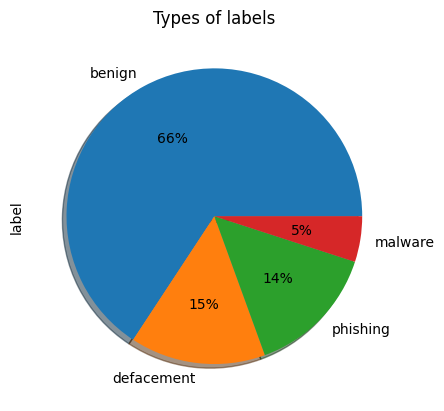

In [ ]:
# Create a new figure to plot the pie chart
plt.figure()

# Access the 'label' column of the DataFrame 'data' and count the occurrences of each unique label
# Then, plot the counts as a pie chart, using the 'kind' parameter to specify the chart type as 'pie'
# 'autopct' specifies the format for the percentage values displayed on the chart
# 'shadow=True' adds a shadow effect to the pie chart
data['label'].value_counts().plot(kind='pie', autopct= '%1.0f%%', shadow=True)

# Set the title of the plot to 'Types of labels'
plt.title('Types of labels')

# Display the pie chart
plt.show()

# Split the data to train and test

In [ ]:
# Import the TfidfVectorizer class from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of the TfidfVectorizer class
# TfidfVectorizer is used to convert text data into numerical feature vectors
vectorizer = TfidfVectorizer()

# Use the 'fit_transform' method of the TfidfVectorizer to convert the 'text' column of the DataFrame 'data'
# into a TF-IDF weighted numerical matrix representation, represented by variable 'X'
# 'fit_transform' fits the vectorizer to the data and transforms the data into a matrix simultaneously
X = vectorizer.fit_transform(data['text'])

# The resulting matrix 'X' now contains the TF-IDF weighted representations of the text data
# 'X.shape' returns the shape of the matrix, where the first dimension represents the number of documents (rows)
# and the second dimension represents the number of unique words (features) in the text data (columns)
X.shape

(651191, 590757)

In [ ]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Use train_test_split to split the data and labels into training and testing sets
# The 'X' variable contains the TF-IDF weighted matrix, and 'data['label']' contains the corresponding labels
# The 'train_size' parameter is set to 0.1, indicating 10% of the data is used for training
# The 'test_size' parameter is set to 0.03, indicating 3% of the data is used for testing
# The 'random_state' parameter is set to 1337, ensuring reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], train_size=0.1, test_size=0.03, random_state=1337) #Default is test_size = 0.25

#train_sample_size = 1000 #len(X)*0.75
#print(train_sample_size)


# Print the shapes of the training and testing sets
print('X_train shape is', X_train.shape)
print('y_train shape is', y_train.shape)
print('X_test shape is', X_test.shape)
print('y_test shape is', y_test.shape)

# Print the counts of unique labels in the training set using pandas' value_counts() function
print(pd.value_counts(y_train))

X_train shape is (65119, 590757)
y_train shape is (65119,)
X_test shape is (19536, 590757)
y_test shape is (19536,)
benign        42788
defacement     9556
phishing       9485
malware        3290
Name: label, dtype: int64


# Train the Model!

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
#Train sk Model
#model = LogisticRegression()
model = DecisionTreeClassifier()
#model = RandomForestClassifier()

classifier = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cols = list(classifier.classes_)

In [ ]:
# Assuming 'y_test' contains the true labels of the test data
# and 'y_pred' contains the predicted labels generated by the classifier

# Calculate the accuracy by comparing the true labels ('y_test') with the predicted labels ('y_pred')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9340192465192465


# Confusion Matrix

[Text(0, 0.5, 'benign'),
 Text(0, 1.5, 'defacement'),
 Text(0, 2.5, 'malware'),
 Text(0, 3.5, 'phishing')]

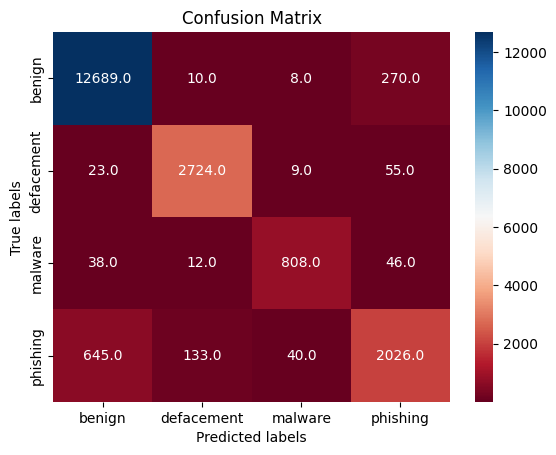

In [ ]:
# Create a subplot for the confusion matrix plot
ax = plt.subplot()

# Compute the confusion matrix using scikit-learn's confusion_matrix function
CM_LR = confusion_matrix(y_test,y_pred)

#sns.heatmap(CM_LR, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(CM_LR, annot=True, fmt = ".1f",cmap="RdBu")
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(cols)
ax.yaxis.set_ticklabels(cols)

# Play with some 'fake' entries!

In [ ]:
test_input = pd.Series('www.google.com')
print(model.predict(vectorizer.transform(test_input))[0])

phishing


In [ ]:
print(data.iloc[1340])
print(data.iloc[1340]['text'])

text     http://distrimarsanitarios.soydg.com/wp-conten...
label                                             phishing
Name: 1340, dtype: object
http://distrimarsanitarios.soydg.com/wp-content/themes/jay/178bccdcc72168f6eaeec8c4b3b336fe/


In [ ]:
test_input = pd.Series('http://distrimarsanitarios.soydg.com/wp-content/themes/jay/178bccdcc72168f6eaeec8c4b3b336fe/')
print(test_input)
print(model.predict(vectorizer.transform(test_input))[0])

0    http://distrimarsanitarios.soydg.com/wp-conten...
dtype: object
phishing


In [ ]:
import joblib

In [ ]:
joblib.dump(model, "decision_tree_model.pkl")
joblib.dump(model, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']